[[1.0000e+00 1.7100e+02]
 [2.0000e+00 5.6880e+03]
 [3.0000e+00 8.1180e+03]
 [4.0000e+00 1.0394e+04]
 [5.0000e+00 1.1780e+04]
 [6.0000e+00 1.4221e+04]
 [7.0000e+00 1.6028e+04]
 [8.0000e+00 1.6367e+04]
 [9.0000e+00 2.1013e+04]
 [1.0000e+01 2.2834e+04]]
(277, 2)
Número de entradas incorrectas: 0
Parámetros del modelo fp1: [  3191.57674896 -32822.74572281]
Error del modelo fp1: [3.81883534e+10]
Parámetros del modelo fp2: [ 1.30146966e+00  2.82976818e+03 -1.59986474e+04]
Error del modelo fp2: [2.28433801e+10]


C:\Users\vgirr\Anaconda3\lib\site-packages\ipykernel_launcher.py:202: RankWarning: Polyfit may be poorly conditioned


Errores para el conjunto completo de datos:
Error d=1: 38188353369.364822
Error d=2: 22843380093.489716
Error d=3: 16770074620.304417
Error d=10: 6364962790.301039
Error d=63: 3568641794.854353
Errores solamente después del punto de inflexión
Error d=1: 13894766571.938641
Error d=2: 14336685177.153923
Error d=3: 8633209392.990862
Error d=10: 2275197236.593069
Error d=63: 1116880409.216562
Error de inflexión=19915658539.270454
Entrenamiento de datos únicamente despúes del punto de inflexión
Errores después del punto de inflexión
Error d=1: 10742403114.916422
Error d=2: 6146835988.134626
Error d=3: 4932510911.549234
Error d=10: 1639085432.252876
Error d=63: 737493588.686033


C:\Users\vgirr\Anaconda3\lib\site-packages\ipykernel_launcher.py:261: RankWarning: Polyfit may be poorly conditioned


fbt2(x)= 
        2
-6.114 x + 5992 x - 3.428e+05
fbt2(x)-1,000000= 
        2
-6.114 x + 5992 x - 1.343e+06
Prueba de error para después del punto de inflexión
Error d=1: 3615821466.809659
Error d=2: 1943822509.675523
Error d=3: 1694220810.420095
Error d=10: 534801001.309945
Error d=63: 451596565.639862


C:\Users\vgirr\Anaconda3\lib\site-packages\ipykernel_launcher.py:288: RankWarning: Polyfit may be poorly conditioned


        2
-6.114 x + 5992 x - 3.428e+05
        2
-6.114 x + 5992 x - 1.343e+06

1.0000.000 de contagios historicos esperado en la semana 90.449311


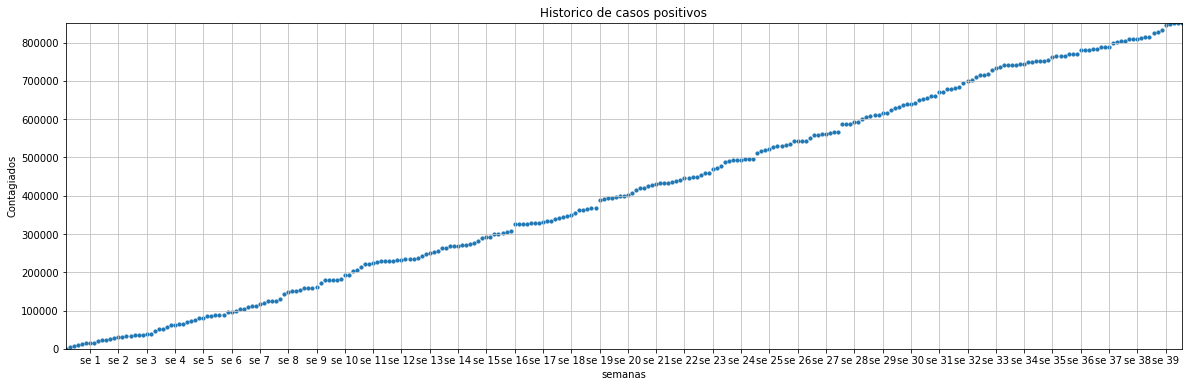

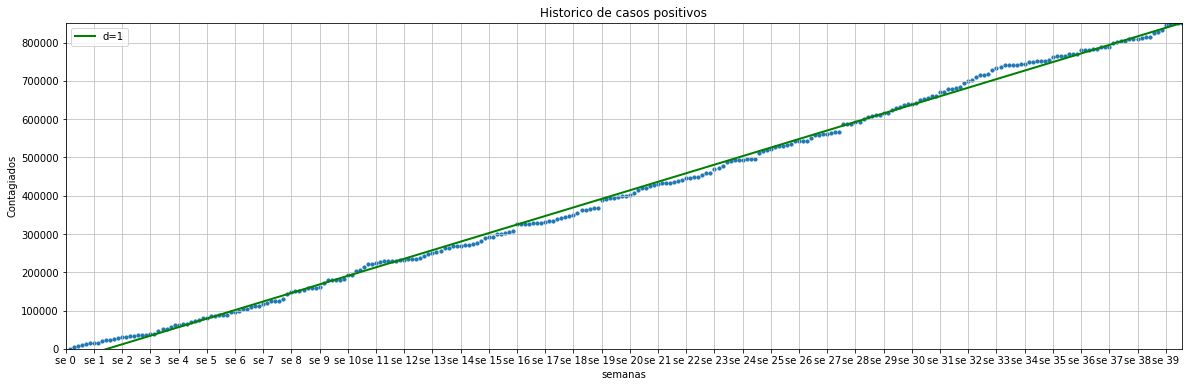

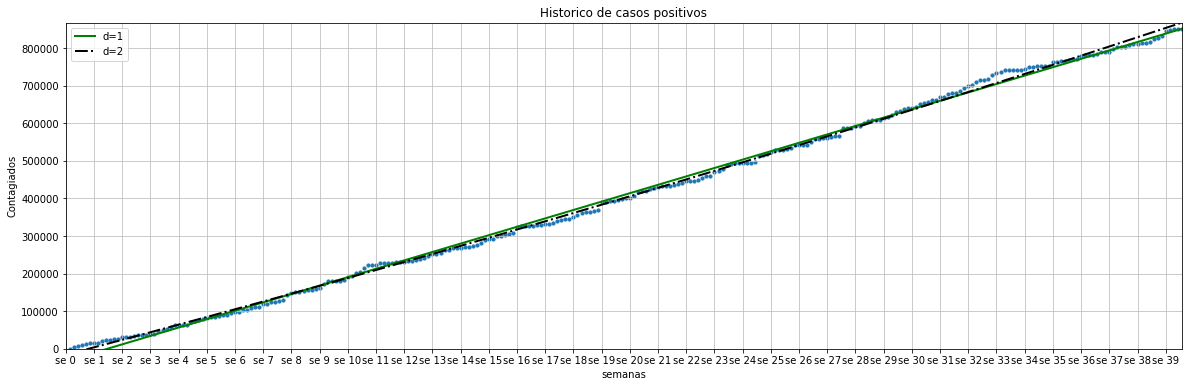

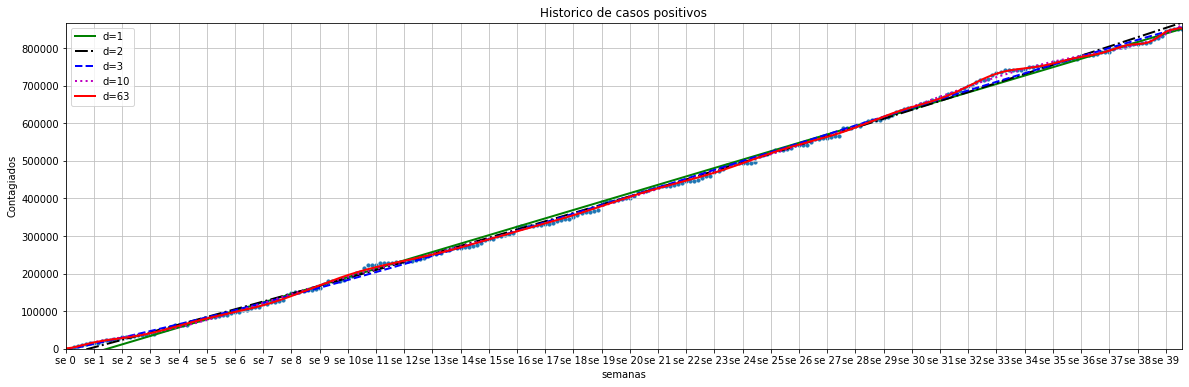

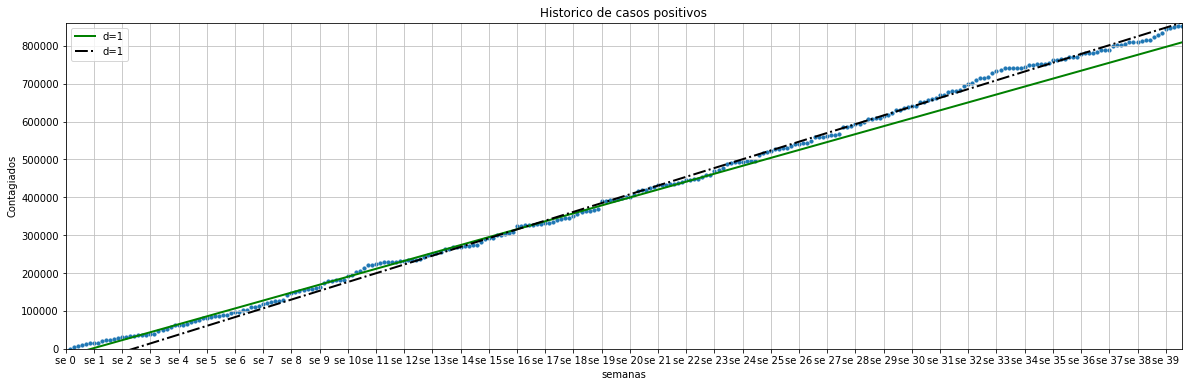

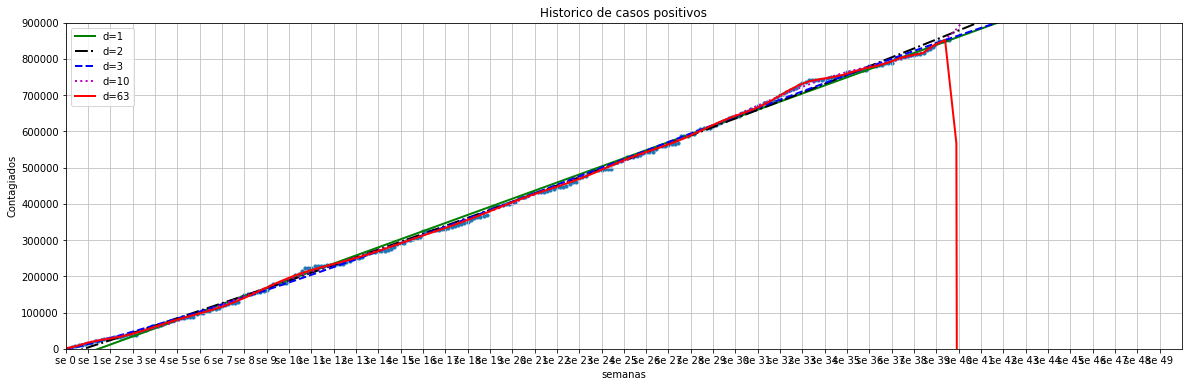

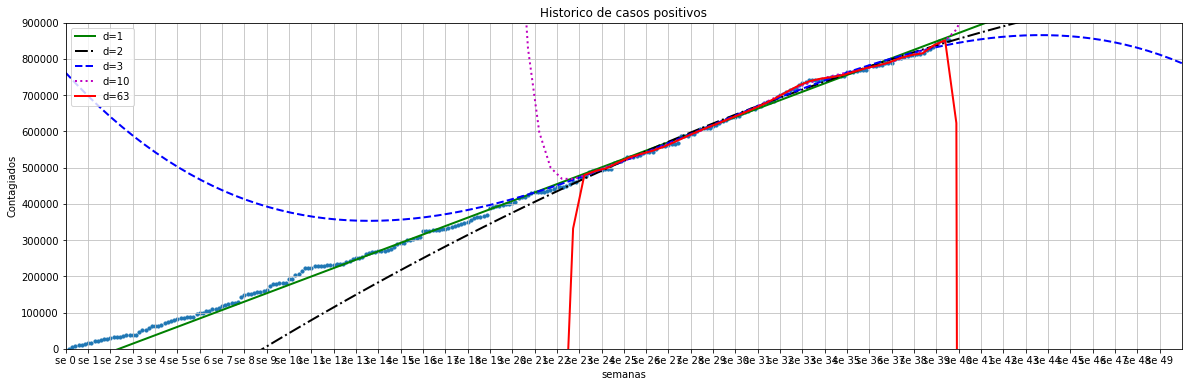

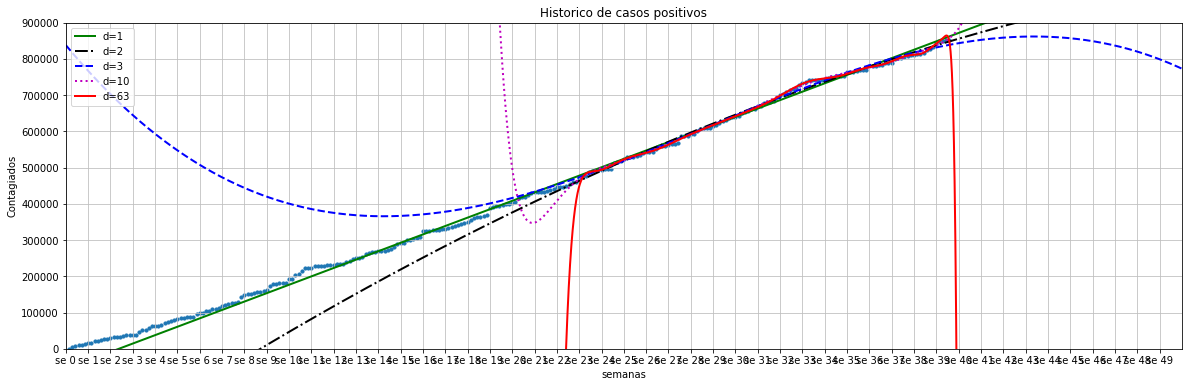

In [3]:
# COMPUTACIÓN BLANDA - Sistemas y Computación

# -----------------------------------------------------------------
# Datos Historicos del COVID-19 Colombia
# -----------------------------------------------------------------
#
#   ** Se importan los archivos de trabajo
#   ** Se crean las variables
#   ** Se generan los modelos
#   ** Se grafican las funciones
#
# -----------------------------------------------------------------

# Se importa la librería del Sistema Operativo
# Igualmente, la librería utils y numpy
# -----------------------------------------------------------------
import os

# Directorios: chart y data en el directorio de trabajo
# DATA_DIR es el directorio de los datos
# CHART_DIR es el directorio de los gráficos generados
# -----------------------------------------------------------------
from utils import DATA_DIR, CHART_DIR
import numpy as np

# Se eliminan las advertencias por el uso de funciones que en el futuro cambiarán
# -----------------------------------------------------------------
np.seterr(all='ignore')

# Se importa la librería scipy y matplotlib
# -----------------------------------------------------------------
import scipy as sp
import matplotlib.pyplot as plt

# Datos de trabajo
# -----------------------------------------------------------------
data = np.genfromtxt(os.path.join(DATA_DIR, "datos_contagios_organizados.tsv"), 
                     delimiter="\t")

# Se establece el tipo de dato
data = np.array(data, dtype=np.float64)
print(data[:10])
print(data.shape)

# Se definen los colores
# g = green, k = black, b = blue, m = magenta, r = red
# g = verde, k = negro, b = azul, m = magenta, r = rojo
colors = ['g', 'k', 'b', 'm', 'r']

# Se definen los tipos de líneas
# los cuales serán utilizados en las gráficas
linestyles = ['-', '-.', '--', ':', '-']

# Se crea el vector x, correspondiente a la primera columna de data
# Se crea el vercot y, correspondiente a la segunda columna de data
x = data[:, 0]
y = data[:, 1]

# la función isnan(vector) devuelve un vector en el cual los TRUE
# son valores de tipo nan, y los valores FALSE son valores diferentes
# a nan. Con esta información, este vector permite realizar 
# transformaciones a otros vectores (o al mismo vector), y realizar
# operaciones como sumar el número de posiciones TRUE, con lo
# cual se calcula el total de valores tipo nan
print("Número de entradas incorrectas:", np.sum(np.isnan(y)))

# Se eliminan los datos incorrectos
# -----------------------------------------------------------------

# Los valores nan en el vector y deben eliminarse
# Para ello se crea un vector TRUE y FALSE basado en isnan
# Al negar dichos valores (~), los valores que son FALSE se vuelven
# TRUE, y se corresponden con aquellos valores que NO son nan
# Si el vector x, que contiene los valores en el eje x, se afectan
# a partir de dicho valores lógicos, se genera un nuevo vector en
# el que solos se toman aquellos que son TRUE. Por tanto, se crea
# un nuevo vector x, en el cual han desaparecido los correspondientes
# valores de y que son nan

# Esto mismo se aplica, pero sobre el vector y, lo cual hace que tanto
# x como y queden completamente sincronizados: sin valores nan
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

# CON ESTA FUNCIÓN SE DEFINE UN MODELO, EL CUAL CONTIENE 
# el comportamiento de un ajuste con base en un grado polinomial
# elegido
# -----------------------------------------------------------------
def plot_models(x, y, models, fname, mx=None, ymax=None, xmin=None):
    ''' dibujar datos de entrada '''

    # Crea una nueva figura, o activa una existente.
    # num = identificador, figsize: anchura, altura
    plt.figure(num=None, figsize=(20, 6))
    
    # Borra el espacio de la figura
    plt.clf()
    
    # Un gráfico de dispersión de y frente a x con diferentes tamaños 
    # y colores de marcador (tamaño = 10)
    plt.scatter(x, y, s=10)
    
    
    plt.title("Historico de casos positivos")
    
   
    plt.xlabel("semanas")
    
 
    plt.ylabel("Contagiados")
    
    # Obtiene o establece las ubicaciones de las marcas 
    # actuales y las etiquetas del eje x.
    
    # Los primeros corchetes ([]) se refieren a las marcas en x
    # Los siguientes corchetes ([]) se refieren a las etiquetas
    
    # En el primer corchete se tiene: 1*7 + 2*7 + ..., hasta
    # completar el total de puntos en el eje horizontal, según
    # el tamaño del vector x
    
    # Además, se aprovecha para calcular los valores de w, los
    # cuales se agrupan en paquetes de w*7. Esto permite
    # determinar los valores de w desde 1 hasta 50, indicando
    # con ello que se tiene un poco más de 40 semanas
    
    # Estos valores se utilizan en el segundo corchete para
    # escribir las etiquetas basadas en estos valores de w
    
    # Por tanto, se escriben etiquetas para w desde 1 hasta
    # 50, lo cual constituye las semanas analizadas
    plt.xticks(
        [w * 7 for w in range(50)], 
        ['se %i' % w for w in range(50)])

    # Aquí se evalúa el tipo de modelo recibido
    # Si no se envía ninguno, no se dibuja ninguna curva de ajuste
    if models:
        
        # Si no se define ningún valor para mx (revisar el 
        # código más adelante), el valor de mx será
        # calculado con la función linspace

        # NOTA: linspace devuelve números espaciados uniformemente 
        # durante un intervalo especificado. En este caso, sobre
        # el conjunto de valores x establecido
        if mx is None:
            mx = np.linspace(0, x[-1], 1000)
        
        # La función zip () toma elementos iterables 
        # (puede ser cero o más), los agrega en una tupla y los devuelve
        
        # Aquí se realiza un ciclo .....
        
        
        #itera para crear el modelo, color y estilo de las lineas
        for model, style, color in zip(models, linestyles, colors):
            # print "Modelo:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)
            
        #agrega etiquetas descriptivas y las organica con un for dentro de models para cada serie de datos que dibuje 
        plt.legend(["d=%i" % m.order for m in models], loc="upper left")

    # es el ajuste de escala para los ejes 
    plt.autoscale(tight=True)
    
    #pone limite al eje y
    plt.ylim(ymin=0)
    
    #establece los limites maximos hasta donde va para y 
    if ymax:
        plt.ylim(ymax=ymax)
    #establece los limites maximos hasta donde va para x    
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')
    plt.savefig(fname)

# Primera mirada a los datos
# -----------------------------------------------------------------
#dubuja la grafica basado en el archivo 
plot_models(x, y, None, os.path.join(CHART_DIR, "1400_01_01.png"))

# Crea y dibuja los modelos de datos
# -----------------------------------------------------------------
#esta funcion devuelve los coheficientes para un polinomio de cualquier grado, que es la mejor solucion
#va guardando los datos obtenidos respectivamente en el orden de variables 
fp1, res1, rank1, sv1, rcond1 = np.polyfit(x, y, 1, full=True)
print("Parámetros del modelo fp1: %s" % fp1)
print("Error del modelo fp1:", res1)
#ajusta la curva a los puntos
f1 = sp.poly1d(fp1)

fp2, res2, rank2, sv2, rcond2 = np.polyfit(x, y, 2, full=True)
print("Parámetros del modelo fp2: %s" % fp2)
print("Error del modelo fp2:", res2)
f2 = sp.poly1d(fp2)

f3 = sp.poly1d(np.polyfit(x, y, 3))
f10 = sp.poly1d(np.polyfit(x, y, 10))
f100 = sp.poly1d(np.polyfit(x, y, 100))

# Se grafican los modelos
# -----------------------------------------------------------------
plot_models(x, y, [f1], os.path.join(CHART_DIR, "1400_01_02.png"))
plot_models(x, y, [f1, f2], os.path.join(CHART_DIR, "1400_01_03.png"))
plot_models(x, y, [f1, f2, f3, f10, f100], os.path.join(CHART_DIR, "1400_01_04.png"))

# Ajusta y dibuja un modelo utilizando el conocimiento del punto
# de inflexión
# -----------------------------------------------------------------
inflexion = 23 * 7 
xa = x[:int(inflexion)]
ya = y[:int(inflexion)]
xb = x[int(inflexion):]
yb = y[int(inflexion):]

# Se grafican dos líneas rectas
# -----------------------------------------------------------------
fa = sp.poly1d(np.polyfit(xa, ya, 1))
fb = sp.poly1d(np.polyfit(xb, yb, 1))

# Se presenta el modelo basado en el punto de inflexión
# -----------------------------------------------------------------
plot_models(x, y, [fa, fb], os.path.join(CHART_DIR, "1400_01_05.png"))

# Función de error
# -----------------------------------------------------------------
def error(f, x, y):
    return np.sum((f(x) - y) ** 2)

# Se imprimen los errores
# -----------------------------------------------------------------
print("Errores para el conjunto completo de datos:")
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, x, y)))

print("Errores solamente después del punto de inflexión")
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

print("Error de inflexión=%f" % (error(fa, xa, ya) + error(fb, xb, yb)))
#######################################################################################################################

########################################################################################################################

# Se extrapola de modo que se proyecten respuestas en el futuro
# -----------------------------------------------------------------
plot_models(
    x, y, [f1, f2, f3, f10, f100],
    os.path.join(CHART_DIR, "1400_01_06.png"),
    mx=np.linspace(0 * 7 , 50 * 7, 100),
    ymax=900000, xmin=0 * 7)

print("Entrenamiento de datos únicamente despúes del punto de inflexión")
fb1 = fb
fb2 = sp.poly1d(np.polyfit(xb, yb, 2))
fb3 = sp.poly1d(np.polyfit(xb, yb, 3))
fb10 = sp.poly1d(np.polyfit(xb, yb, 10))
fb100 = sp.poly1d(np.polyfit(xb, yb, 100))

print("Errores después del punto de inflexión")
for f in [fb1, fb2, fb3, fb10, fb100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

# Gráficas después del punto de inflexión
# -----------------------------------------------------------------
plot_models(
    x, y, [fb1, fb2, fb3, fb10, fb100],
    os.path.join(CHART_DIR, "1400_01_07.png"),
    mx=np.linspace(0 * 7, 50 * 7, 100),
    ymax=900000, xmin=0 * 7)

# Separa el entrenamiento de los datos de prueba
# -----------------------------------------------------------------
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = sp.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])
fbt1 = sp.poly1d(np.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(np.polyfit(xb[train], yb[train], 2))
print("fbt2(x)= \n%s" % fbt2)
print("fbt2(x)-1,000000= \n%s" % (fbt2-1000000))
fbt3 = sp.poly1d(np.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(np.polyfit(xb[train], yb[train], 10))
fbt100 = sp.poly1d(np.polyfit(xb[train], yb[train], 100))

print("Prueba de error para después del punto de inflexión")
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

plot_models(
    x, y, [fbt1, fbt2, fbt3, fbt10, fbt100],
    os.path.join(CHART_DIR, "1400_01_08.png"),
    mx=np.linspace(0 * 7, 50 * 7, 10000),
    ymax=900000, xmin=0 * 7)

from scipy.optimize import fsolve
print(fbt2)
print(fbt2 - 1000000)
alcanzado_max = fsolve(fbt2 - 1000000, x0=800) / (7)
print("\n1.0000.000 de contagios historicos esperado en la semana %f" % 
      alcanzado_max[0])